Using the attached 'heart.csv' dataset, train two classifiers

- logistic regressor with GridSearchCV search of parameter C = [0.1, 1, 10, 100, 1000]
- and GaussianNB classifier.

Divide the data set in the ratio of 7 to 3 into training and test.

From among the models trained, choose the better one based on the sensitivity metrics (recall).

After selecting the best model, visualize its error matrix.

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv', sep=',')
#df.info()
y = df.iloc[:,-1].to_numpy()
X = df.iloc[:, :-1].to_numpy()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
model_logreg = LogisticRegression()
param_grid= {"C": [0.1, 1.0, 10.0, 100.0, 1000]}
grid = GridSearchCV(model_logreg, param_grid, refit = True, scoring="accuracy", verbose = 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.814 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.860 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.833 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.833 total time=   0.0s
[CV 1/5] END .............................C=1.0;, score=0.837 total time=   0.0s
[CV 2/5] END .............................C=1.0;, score=0.884 total time=   0.0s
[CV 3/5] END .............................C=1.0;, score=0.810 total time=   0.0s
[CV 4/5] END .............................C=1.0;, score=0.881 total time=   0.0s
[CV 5/5] END .............................C=1.0;, score=0.833 total time=   0.0s
[CV 1/5] END ............................C=10.0;, score=0.837 total time=   0.0s
[CV 2/5] END ............................C=10.0;,

C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

[CV 4/5] END ............................C=10.0;, score=0.881 total time=   0.0s
[CV 5/5] END ............................C=10.0;, score=0.833 total time=   0.0s
[CV 1/5] END ...........................C=100.0;, score=0.837 total time=   0.0s
[CV 2/5] END ...........................C=100.0;, score=0.860 total time=   0.0s
[CV 3/5] END ...........................C=100.0;, score=0.810 total time=   0.0s
[CV 4/5] END ...........................C=100.0;, score=0.881 total time=   0.0s
[CV 5/5] END ...........................C=100.0;, score=0.833 total time=   0.0s
[CV 1/5] END ............................C=1000;, score=0.814 total time=   0.0s
[CV 2/5] END ............................C=1000;, score=0.884 total time=   0.0s
[CV 3/5] END ............................C=1000;, score=0.810 total time=   0.0s
[CV 4/5] END ............................C=1000;, score=0.881 total time=   0.0s
[CV 5/5] END ............................C=1000;, score=0.833 total time=   0.0s


C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0, 1000]},
             scoring='accuracy', verbose=3)

In [8]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [12]:
naive_model = GaussianNB().fit(X_train, y_train)
naive_predictions = naive_model.predict(X_test)

In [13]:
print(classification_report(y_test, naive_predictions))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



Logistic regression has better recall precision.

[[33 11]
 [ 4 43]]


C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


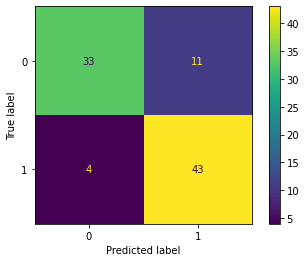

In [18]:
print(confusion_matrix(y_test, grid_predictions))
plot = plot_confusion_matrix(grid, X_test, y_test, normalize=None)
plt.show()